<a href="https://colab.research.google.com/github/Mohima17/MSThesis/blob/main/Eddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install pyEddyTracker

In [ ]:
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"

In [ ]:
!pip install basemap

In [5]:
!pip install cartopy

     |████████████████████████████████| 10.8 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 29.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 10.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516294 sha256=1ddc1eff7e48aaee3f5ccefaac31157f92066f887f78e3cc06bfc4a06b0cb6aa
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


In [ ]:
!pip install shapely --no-binary shapely cartopy

In [ ]:
!pip install --no-binary shapely shapely --force

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from datetime import datetime
import matplotlib as mpl
import random
import os
from datetime import datetime
from matplotlib import pyplot as plt
from numpy import arange
from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.eddy_feature import Contours



In [9]:
df = xr.open_mfdataset('drive/MyDrive/2020/SLA/2020.nc')

adt = df['adt'].values

adt = np.nan_to_num(adt)

adt.max()

1.9443000000000001

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/2020.nc


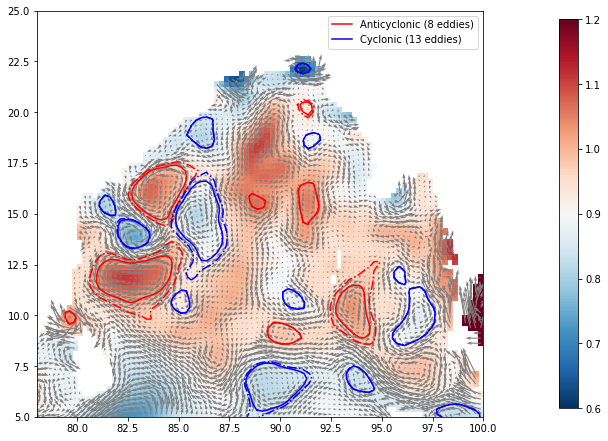

In [10]:
def start_axes(title):
    fig = plt.figure(figsize=(13, 6))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(78,100), ax.set_ylim(5,25)
    ax.set_aspect("equal")
    #ax.set_title(title, weight="bold")
    return ax


def update_axes(ax, mappable=None):
    #ax.grid()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.8, 0.05, 0.02, 0.9]))


g = RegularGridDataset('drive/MyDrive/2020/SLA/2020.nc', "longitude", "latitude",)

ax = start_axes("Eddies detected")
m = g.display(ax, "adt", vmin=0.6, vmax=1.2, cmap="RdBu_r")

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="r", linewidth= 1.5, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 1.5, label="Cyclonic ({nb_obs} eddies)", ref=-10)



g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

ax.legend(loc='upper right')

update_axes(ax, m)



In [11]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/2020.nc


/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloadin

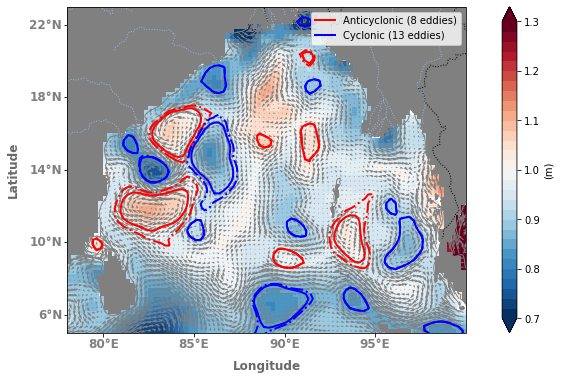

In [12]:
plt.figure(figsize=(13, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 23], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/2020.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')


#plt.savefig('drive/MyDrive/2020/eddy.pdf')


In [ ]:
############################# Amplitude ###########################################

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/2020.nc
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:180: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:185: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:242: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reus

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


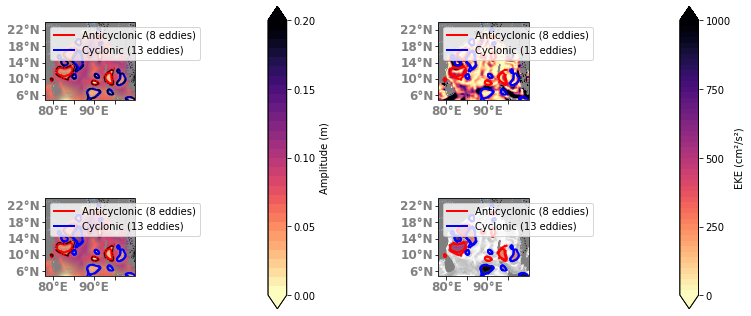

In [13]:
g = RegularGridDataset('drive/MyDrive/2020/SLA/2020.nc', "longitude", "latitude",)


fig = plt.figure(figsize=(13, 6))

############################### CE ####################################


############################# First Plot ##############################

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}


n = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap="magma_r")

date = datetime(2020, 7, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")


kwargs = dict(extern_only=True, color="k", lw=1)
a.display(ax, **kwargs), c.display(ax, **kwargs)
a.filled(ax, "amplitude", cmap="magma_r", vmin=0, vmax=0.5)
m = c.filled(ax, "amplitude", cmap = plt.cm.get_cmap("magma_r", 30), vmin=0, vmax=0.2)

u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

plt.colorbar(m, cax=ax.figure.add_axes([0.48, 0.15, 0.02, 0.7]), extend='both', ticks=np.linspace(0, 0.2, num=5), label="Amplitude (m)")


ax.legend(loc='upper left')

fig.tight_layout(pad=8.0)

##### Second Plot ########

ax1 = fig.add_subplot(222, projection=ccrs.PlateCarree())
ax1.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax1.add_feature(cfeature.LAND, color = 'gray')
ax1.add_feature(cfeature.COASTLINE, color = 'gray')
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax1.set_xticks([80, 85, 90, 95])
ax1.set_yticks([6, 10, 14, 18, 22])

ax1.set_yticklabels([])
ax1.set_xticklabels([])

gl1 = ax1.gridlines()
gl1.bottom_labels = True
gl1.left_labels = True
gl1.xlines = False
gl1.ylines = False

gl1.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl1.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl1.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl1.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}


date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

g.add_uv("adt")
g.add_grid("eke", (g.grid("u") ** 2 + g.grid("v") ** 2) * 0.5 * (100 ** 2))

eke_kwargs = dict(vmin=1, vmax=1000, cmap = plt.cm.get_cmap("magma_r", 50))

m1 = g.display(ax1, "eke", **eke_kwargs)
a.display(ax1, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax1, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

eke = a.interp_grid(g, "eke", method="mean", intern=False)
a.filled(ax1, eke, ref=-10, **eke_kwargs)
eke = c.interp_grid(g, "eke", method="mean", intern=False)
c.filled(ax1, eke, ref=-10, **eke_kwargs)

u, v = g.grid("u").T, g.grid("v").T
ax1.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")


plt.colorbar(m1, cax=ax1.figure.add_axes([0.92, 0.15, 0.02, 0.7]), extend='both', ticks=np.linspace(0, 1000, num=5), label="EKE (cm²/s²)")

ax1.legend(loc='upper left')

########## AC #############################

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
ax3.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax3.add_feature(cfeature.LAND, color = 'gray')
ax3.add_feature(cfeature.COASTLINE, color = 'gray')
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax3.set_xticks([80, 85, 90, 95])
ax3.set_yticks([6, 10, 14, 18, 22])

ax3.set_yticklabels([])
ax3.set_xticklabels([])

gl3 = ax3.gridlines()
gl3.bottom_labels = True
gl3.left_labels = True
gl3.xlines = False
gl3.ylines = False

gl3.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl3.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl3.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl3.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}


n3 = g.display(ax3, "adt", vmin=0.7, vmax=1.3, cmap="magma_r")

date = datetime(2020, 7, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

a.display(ax3, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax3, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")

kwargs = dict(extern_only=True, color="k", lw=1)
a.display(ax3, **kwargs), c.display(ax, **kwargs)
a.filled(ax3, "amplitude", cmap="magma_r", vmin=0, vmax=0.5)
m3 = c.filled(ax3, "amplitude", cmap = plt.cm.get_cmap("magma_r", 30), vmin=0, vmax=0.2)

u, v = g.grid("u").T, g.grid("v").T
ax3.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

plt.colorbar(m3, cax=ax3.figure.add_axes([0.48, 0.15, 0.02, 0.7]), extend='both', ticks=np.linspace(0, 0.2, num=5), label="Amplitude (m)")


ax3.legend(loc='upper left')

fig.tight_layout(pad=8.0)

##### 4th Plot ########

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
ax4.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax4.add_feature(cfeature.LAND, color = 'gray')
ax4.add_feature(cfeature.COASTLINE, color = 'gray')
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax4.set_xticks([80, 85, 90, 95])
ax4.set_yticks([6, 10, 14, 18, 22])

ax4.set_yticklabels([])
ax4.set_xticklabels([])

gl4 = ax4.gridlines()
gl4.bottom_labels = True
gl4.left_labels = True
gl4.xlines = False
gl4.ylines = False

gl4.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl4.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl4.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl4.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}


date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

g.add_uv("adt")
g.add_grid("eke", (g.grid("u") ** 2 + g.grid("v") ** 2) * 0.5 * (100 ** 2))

eke_kwargs = dict(vmin=1, vmax=1000, cmap = plt.cm.get_cmap("magma_r", 50))

m4 = g.display(ax1, "eke", **eke_kwargs)
a.display(ax4, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax4, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

eke = a.interp_grid(g, "eke", method="mean", intern=False)
a.filled(ax4, eke, ref=-10, **eke_kwargs)
eke = c.interp_grid(g, "eke", method="mean", intern=False)
c.filled(ax4, eke, ref=-10, **eke_kwargs)

u, v = g.grid("u").T, g.grid("v").T
ax4.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")


plt.colorbar(m4, cax=ax1.figure.add_axes([0.92, 0.15, 0.02, 0.7]), extend='both', ticks=np.linspace(0, 1000, num=5), label="EKE (cm²/s²)")

ax4.legend(loc='upper left')


#plt.savefig('drive/MyDrive/2020/amp+eke.png')

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/2020.nc
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


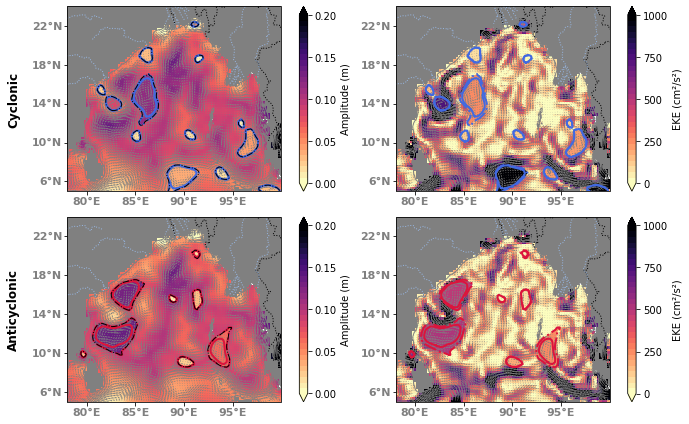

In [14]:
g = RegularGridDataset('drive/MyDrive/2020/SLA/2020.nc', "longitude", "latitude",)


fig = plt.figure(figsize=(13, 6))

############################### CE ####################################


############################# First Plot ##############################

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
ax.set_ylabel('Cyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}


n = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap="magma_r")

date = datetime(2020, 7, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

c.display(ax, color="royalblue", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")


kwargs = dict(extern_only=True, color="k", lw=1)
c.display(ax, **kwargs)
m = c.filled(ax, "amplitude", cmap = plt.cm.get_cmap("magma_r", 30), vmin=0, vmax=0.2)

u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#plt.colorbar(m, cax=ax.figure.add_axes([0.48, 0.15, 0.02, 0.7]), extend='both', ticks=np.linspace(0, 0.2, num=5), label="Amplitude (m)")

plt.colorbar(m, extend='both', ticks=np.linspace(0, 0.2, num=5), label="Amplitude (m)")



##### Second Plot ########

ax1 = fig.add_subplot(222, projection=ccrs.PlateCarree())
ax1.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax1.add_feature(cfeature.LAND, color = 'gray')
ax1.add_feature(cfeature.COASTLINE, color = 'gray')
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax1.set_xticks([80, 85, 90, 95])
ax1.set_yticks([6, 10, 14, 18, 22])

ax1.set_yticklabels([])
ax1.set_xticklabels([])

gl1 = ax1.gridlines()
gl1.bottom_labels = True
gl1.left_labels = True
gl1.xlines = False
gl1.ylines = False

gl1.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl1.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl1.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl1.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}


date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

g.add_uv("adt")
g.add_grid("eke", (g.grid("u") ** 2 + g.grid("v") ** 2) * 0.5 * (100 ** 2))

eke_kwargs = dict(vmin=1, vmax=1000, cmap = plt.cm.get_cmap("magma_r", 30))

m1 = g.display(ax1, "eke", **eke_kwargs)
c.display(ax1, color="royalblue", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)


eke = c.interp_grid(g, "eke", method="mean", intern=False)
c.filled(ax1, eke, ref=-10, **eke_kwargs)

u, v = g.grid("u").T, g.grid("v").T
ax1.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")


#plt.colorbar(m1, cax=ax1.figure.add_axes([0.92, 0.15, 0.02, 0.7]), extend='both', ticks=np.linspace(0, 1000, num=5), label="EKE (cm²/s²)")

plt.colorbar(m1, extend='both', ticks=np.linspace(0, 1000, num=5), label="EKE (cm²/s²)")



########## AC #############################

############### third Plot ####################

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
ax3.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax3.add_feature(cfeature.LAND, color = 'gray')
ax3.add_feature(cfeature.COASTLINE, color = 'gray')
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax3.set_xticks([80, 85, 90, 95])
ax3.set_yticks([6, 10, 14, 18, 22])

ax3.set_yticklabels([])
ax3.set_xticklabels([])

gl3 = ax3.gridlines()
gl3.bottom_labels = True
gl3.left_labels = True
gl3.xlines = False
gl3.ylines = False

gl3.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl3.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl3.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl3.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}


n3 = g.display(ax3, "adt", vmin=0.7, vmax=1.3, cmap="magma_r")

date = datetime(2020, 7, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

a.display(ax3, color="crimson", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)


g.add_uv("adt")

kwargs = dict(extern_only=True, color="k", lw=1)
a.display(ax3, **kwargs), 

m3 = a.filled(ax3, "amplitude", cmap = plt.cm.get_cmap("magma_r", 30), vmin=0, vmax=0.2)

u, v = g.grid("u").T, g.grid("v").T
ax3.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#plt.colorbar(m3, cax=ax3.figure.add_axes([0.48, 0.15, 0.02, 0.7]), extend='both', ticks=np.linspace(0, 0.2, num=5), label="Amplitude (m)")

plt.colorbar(m3, extend='both', ticks=np.linspace(0, 0.2, num=5), label="Amplitude (m)")



##### 4th Plot ########

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
ax4.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax4.add_feature(cfeature.LAND, color = 'gray')
ax4.add_feature(cfeature.COASTLINE, color = 'gray')
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax4.set_xticks([80, 85, 90, 95])
ax4.set_yticks([6, 10, 14, 18, 22])

ax4.set_yticklabels([])
ax4.set_xticklabels([])

gl4 = ax4.gridlines()
gl4.bottom_labels = True
gl4.left_labels = True
gl4.xlines = False
gl4.ylines = False

gl4.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl4.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl4.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl4.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}


date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

g.add_uv("adt")
g.add_grid("eke", (g.grid("u") ** 2 + g.grid("v") ** 2) * 0.5 * (100 ** 2))

eke_kwargs = dict(vmin=1, vmax=1000, cmap = plt.cm.get_cmap("magma_r", 30))

m4 = g.display(ax4, "eke", **eke_kwargs)
a.display(ax4, color="crimson", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)


eke = a.interp_grid(g, "eke", method="mean", intern=False)
a.filled(ax4, eke, ref=-10, **eke_kwargs)


u, v = g.grid("u").T, g.grid("v").T
ax4.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")


#plt.colorbar(m4, cax=ax1.figure.add_axes([0.92, 0.15, 0.02, 0.7]), extend='both', ticks=np.linspace(0, 1000, num=5), label="EKE (cm²/s²)")

plt.colorbar(m4, extend='both', ticks=np.linspace(0, 1000, num=5), label="EKE (cm²/s²)")

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=0.75, top=None, wspace=None, hspace=None)

#plt.savefig('drive/MyDrive/2020/amp+eke_ac.pdf')

In [ ]:
################################### mean EKE ####################################

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/2020.nc


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


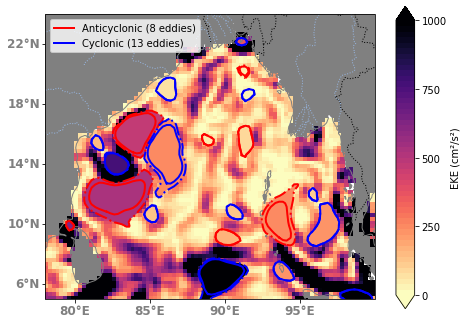

In [15]:
g = RegularGridDataset('drive/MyDrive/2020/SLA/2020.nc', "longitude", "latitude",)


fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}


date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

g.add_uv("adt")
g.add_grid("eke", (g.grid("u") ** 2 + g.grid("v") ** 2) * 0.5 * (100 ** 2))

eke_kwargs = dict(vmin=1, vmax=1000, cmap = plt.cm.get_cmap("magma_r", 50))

m = g.display(ax, "eke", **eke_kwargs)
a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

eke = a.interp_grid(g, "eke", method="mean", intern=False)
a.filled(ax, eke, ref=-10, **eke_kwargs)
eke = c.interp_grid(g, "eke", method="mean", intern=False)
c.filled(ax, eke, ref=-10, **eke_kwargs)

cax = fig.add_axes([0.5, 0.15, 0.02, 0.7])
plt.colorbar(m, cax=cax, extend='both', ticks=np.linspace(0, 1000, num=5), label="EKE (cm²/s²)")

ax.legend(loc='upper left')

In [ ]:
############################### Eddy Detection on SLA and ADT ############################

In [16]:
def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(78, 100), ax.set_ylim(5, 23)
    ax.set_aspect("equal")
    ax.set_title(title)
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    ax.legend()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.95, 0.05, 0.01, 0.9]))

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/2020.nc
/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


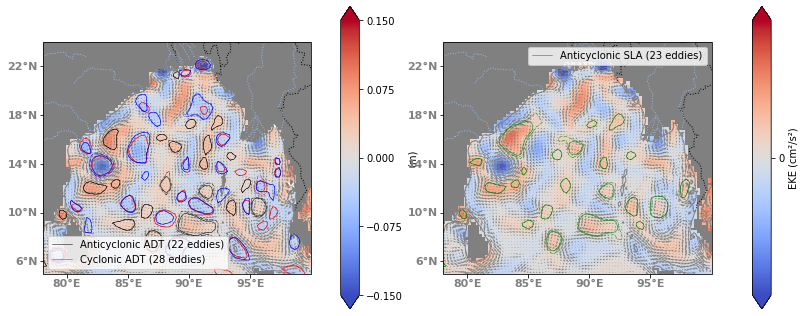

In [23]:
g = RegularGridDataset("drive/MyDrive/2020/SLA/2020.nc", "longitude", "latitude")

g.add_uv("adt", "ugos", "vgos")
g.add_uv("sla", "ugosa", "vgosa")
wavelength = 400
g.copy("adt", "adt_raw")
g.copy("sla", "sla_raw")
g.bessel_high_filter("adt", wavelength)
g.bessel_high_filter("sla", wavelength)
date = datetime(2020, 5, 15)

kwargs_a_adt = dict(lw=0.5, label="Anticyclonic ADT ({nb_obs} eddies)", ref=-10, color="k")
kwargs_c_adt = dict(lw=0.5, label="Cyclonic ADT ({nb_obs} eddies)", ref=-10, color="r")

a_adt, c_adt = g.eddy_identification("adt", "ugos", "vgos", date, 0.002)



fig = plt.figure(figsize=(13, 6))


############################# First Plot ##############################

ax = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
#ax.set_ylabel('Cyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}


m = g.display(ax, "adt", vmin=-0.15, vmax=0.15)
a_adt.display(ax, **kwargs_a_adt), c_adt.display(ax, **kwargs_c_adt)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

ax.legend()

plt.colorbar(m, cax=ax.figure.add_axes([0.48, 0.15, 0.02, 0.7]), extend='both', ticks=np.linspace(-0.15, 0.15, num=5), label="(m)")



fig.tight_layout(pad=10.0)

##### Second Plot ########

ax1 = fig.add_subplot(122, projection=ccrs.PlateCarree())
ax1.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax1.add_feature(cfeature.LAND, color = 'gray')
ax1.add_feature(cfeature.COASTLINE, color = 'gray')
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax1.set_xticks([80, 85, 90, 95])
ax1.set_yticks([6, 10, 14, 18, 22])

ax1.set_yticklabels([])
ax1.set_xticklabels([])

gl1 = ax1.gridlines()
gl1.bottom_labels = True
gl1.left_labels = True
gl1.xlines = False
gl1.ylines = False

gl1.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl1.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl1.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl1.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

kwargs_a_sla = dict(lw=0.5, label="Anticyclonic SLA ({nb_obs} eddies)", ref=-10, color="g")
kwargs_c_sla = dict(lw=0.5, label="Cyclonic SLA ({nb_obs} eddies)", ref=-10, color="b")


a_sla, c_sla = g.eddy_identification("sla", "ugosa", "vgosa", date, 0.002)

m1 = g.display(ax1, "sla", vmin=-0.15, vmax=0.15)
a_sla.display(ax1, **kwargs_a_sla), c_sla.display(ax, **kwargs_c_sla)


g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax1.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

ax1.legend()


plt.colorbar(m1, cax=ax1.figure.add_axes([0.92, 0.15, 0.02, 0.7]), extend='both', ticks=np.linspace(0, 1000, num=5), label="EKE (cm²/s²)")

#plt.colorbar(m1, extend='both', ticks=np.linspace(0, 1000, num=5), label="EKE (cm²/s²)")


In [ ]:
kwargs_a_adt = dict(
    lw=0.5, label="Anticyclonic ADT ({nb_obs} eddies)", ref=-10, color="k"
)
kwargs_c_adt = dict(lw=0.5, label="Cyclonic ADT ({nb_obs} eddies)", ref=-10, color="r")
kwargs_a_sla = dict(
    lw=0.5, label="Anticyclonic SLA ({nb_obs} eddies)", ref=-10, color="g"
)
kwargs_c_sla = dict(lw=0.5, label="Cyclonic SLA ({nb_obs} eddies)", ref=-10, color="b")

In [ ]:
a_adt, c_adt = g.eddy_identification("adt", "ugos", "vgos", date, 0.002)
a_sla, c_sla = g.eddy_identification("sla", "ugosa", "vgosa", date, 0.002)

(<matplotlib.legend.Legend at 0x7f59e458c550>, None)

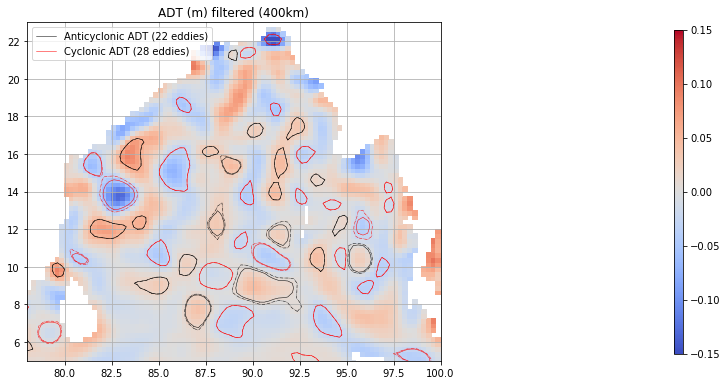

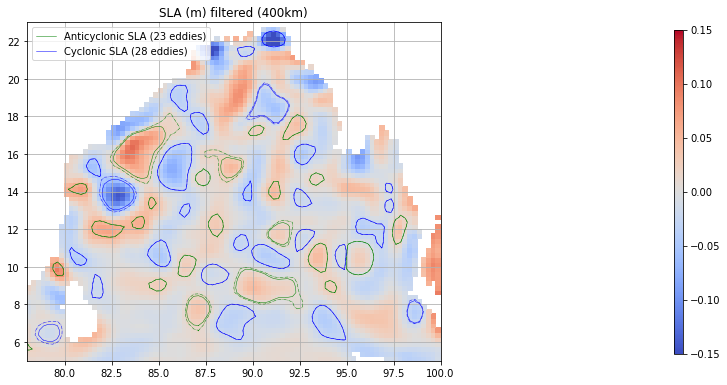

In [ ]:
ax = start_axes(f"ADT (m) filtered ({wavelength}km)")
m = g.display(ax, "adt", vmin=-0.15, vmax=0.15)
a_adt.display(ax, **kwargs_a_adt), c_adt.display(ax, **kwargs_c_adt)
ax.legend(), update_axes(ax, m)

ax = start_axes(f"SLA (m) filtered ({wavelength}km)")
m = g.display(ax, "sla", vmin=-0.15, vmax=0.15)
a_sla.display(ax, **kwargs_a_sla), c_sla.display(ax, **kwargs_c_sla)
ax.legend(), update_axes(ax, m)

(<matplotlib.legend.Legend at 0x7f8bc2cc49d0>, None)

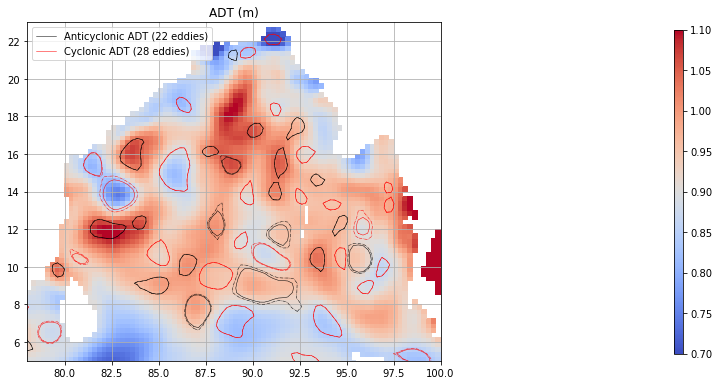

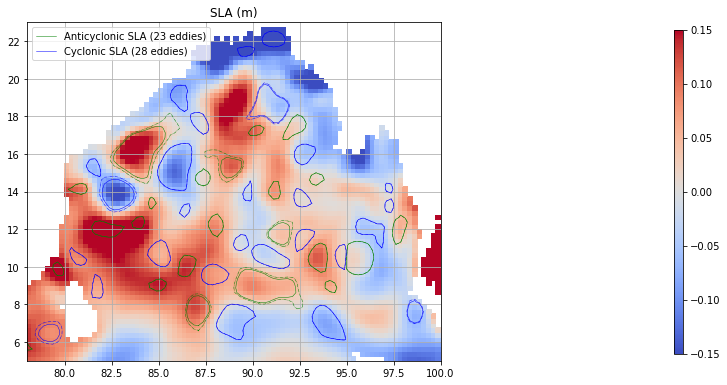

In [ ]:
ax = start_axes("ADT (m)")
m = g.display(ax, "adt_raw", vmin=0.7, vmax=1.1)
a_adt.display(ax, **kwargs_a_adt), c_adt.display(ax, **kwargs_c_adt)
ax.legend(), update_axes(ax, m)

ax = start_axes("SLA (m)")
m = g.display(ax, "sla_raw", vmin=-0.15, vmax=0.15)
a_sla.display(ax, **kwargs_a_sla), c_sla.display(ax, **kwargs_c_sla)
ax.legend(), update_axes(ax, m)

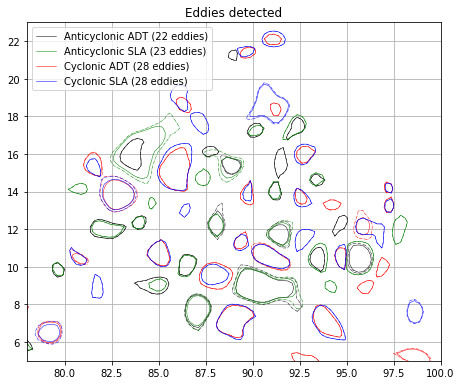

In [ ]:
ax = start_axes("Eddies detected")
a_adt.display(ax, **kwargs_a_adt)
a_sla.display(ax, **kwargs_a_sla)
c_adt.display(ax, **kwargs_c_adt)
c_sla.display(ax, **kwargs_c_sla)
ax.legend()
update_axes(ax)

In [ ]:
 df = xr.open_mfdataset('drive/MyDrive/2020/Vertical/Temperature/dec_won.nc')

 df

<xarray.Dataset>
Dimensions:      (depth: 43, latitude: 101, longitude: 101)
Coordinates:
  * depth        (depth) float64 0.0 5.0 10.0 15.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude     (latitude) float64 0.0 0.25 0.5 0.75 ... 24.25 24.5 24.75 25.0
  * longitude    (longitude) float64 75.0 75.25 75.5 75.75 ... 99.5 99.75 100.0
Data variables:
    temperature  (depth, latitude, longitude) float64 dask.array<chunksize=(43, 101, 101), meta=np.ndarray>

In [ ]:
temp = df['temperature'].values

temp

array([[[28.86996841, 28.88983917, 28.90177536, ..., 29.61900139,
          0.        ,  0.        ],
        [28.88047981, 28.89728737, 28.91845322, ...,  0.        ,
          0.        ,  0.        ],
        [28.8152256 , 28.84309006, 28.87938881, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[28.61212921, 28.63593674, 28.6543541 , ..., 29.60087204,
          0.        ,  0.        ],
        [28.59206581, 28.61261559, 28.64380264, ...,  0.        ,
          0.        ,  0.        ],
        [28.51290131, 28.55342102, 28.60096741, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  